In [1]:
### SEE https://github.com/anarinsk/korparty_subsidy/blob/master/README.md

import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import openpyxl as xl
import numpy as np

In [2]:
def read_subsidy(year):
    sheet = pd.read_excel('raw_data/subsidy.xlsx', year, header=2)
    sheet.reset_index(inplace=True)
#
    if 'index' in sheet.columns: 
        cols = [0,2]
        sheet.drop(sheet.columns[cols], axis=1, inplace=True)
    else:
        sheet.columns = sheet.iloc[0,:]
        sheet.drop(0, inplace=True)
        sheet.drop(sheet.columns[1], axis=1, inplace=True)   
#
    sheet.rename(columns={sheet.columns[0]:'type'}, inplace=True)
    sheet['year'] = year 
    return sheet 

In [5]:
def load_concat_raw(dir):
    sheet_names = xl.load_workbook(dir).sheetnames
    sheets = [read_subsidy(this_year) for this_year in sheet_names]
    return pd.concat(sheets, sort=False)

In [6]:
DF_raw = load_concat_raw('raw_data/subsidy.xlsx')

In [7]:
def tidy_raw(raw):
    # melt and remove nan 
    raw = pd.melt(raw, id_vars=['year', 'type']) # 
    con0 = raw.type.isna()
    raw = raw[~con0]
    # remove unnecessary types 
    con_a = raw.type.str.contains('소계')
    con_b = raw.type.str.contains('총지급액')
    con_ab = con_a | con_b
    raw = raw[~con_ab]
    # trim value col
    raw['value'] = raw['value'].replace('-', np.nan)
    con_c = raw.value.isna()
    raw = raw[~con_c]
    raw.columns = ['year', 'type', 'party', 'subsidy']
    raw.party = raw.party.str.replace(' ', '')
    raw.type = raw.type.str.replace(' ', '').str.replace('\n', '_')
    raw.year = raw.year.astype(int)
    raw.subsidy = pd.to_numeric(raw.subsidy, errors='coerce')
    return raw.reset_index(drop=True) 

In [8]:
DF_tidy = tidy_raw(DF_raw)

In [9]:
DF_tidy

,year,type,party,subsidy
0,2001,1/4분기,한나라당,2.610344e+09
1,2001,2/4분기,한나라당,2.607313e+09
2,2001,3/4분기,한나라당,2.953328e+09
3,2001,4/4분기,한나라당,3.031602e+09
4,2002,1/4분기,한나라당,3.034400e+09
5,2002,2/4분기,한나라당,2.976491e+09
6,2002,3/4분기,한나라당,2.994209e+09
7,2002,4/4분기,한나라당,2.938071e+09
8,2002,지방선거_보조금,한나라당,2.734338e+10
9,2002,대선_보조금,한나라당,1.382519e+10


In [10]:
data = {'party': ['개혁국민정당', '구)민주당', '국민생각', '국민의당', '국민중심당', '국민중심연합', '국민참여당',
       '국민통합21', '기독자유당', '대통합민주신당', '대한애국당', '더불어민주당', '미래희망연대', '민주당',
       '민주국민당', '민주노동당', '민주통합당', '민주평화당', '민중당', '민중연합당', '바른미래당',
       '바른정당', '새누리당', '새정치민주연합', '선진통일당', '열린우리당', '자민련', '자유민주연합',
       '자유선진당', '자유한국당', '정의당', '중도개혁통합신당', '중도통합민주당', '진보신당', '진보정의당',
       '참주인연합', '창조한국당', '친박연대', '통합민주당', '통합진보당', '하나로국민연합', '한국미래연합',
       '한국신당', '한나라당'], 
        'position': ['left', 'right', 'right', 'central', 'right', 'right', 'left', 
                     'right', 'right', 'left', 'right', 'left', 'right', 'left', 
                     'right', 'left', 'left', 'left', 'left', 'left', 'right', 
                     'right', 'right', 'left', 'right', 'left', 'right', 'right', 
                     'right', 'right', 'left', 'left', 'left', 'left', 'left', 
                     'right', 'central', 'right', 'left', 'left', 'right', 'right', 
                     'right', 'right'], 
        'is_big2': [False, False, False, False, False, False, False, 
                    False, False, True, False, True, False, True, 
                    False, False, True, True, False, False, False, 
                    False, True, True, False, True, False, False, 
                    False, True, False, False, False, False, False, 
                    False, False, False, True, False, False, False, 
                    False, True]}       
DF_info = pd.DataFrame(data)

In [11]:
DF = DF_tidy.merge(DF_info, on='party', how='right')


def clean_type(df):
    criteria = 'type == "선거보조금" & year == "2006"'
    df.loc[df.eval(criteria), 'type'] = "지선보조금"
    criteria = 'type == "선거보조금" & year == "2007"'
    df.loc[df.eval(criteria), 'type'] = "대선보조금"
    criteria = 'type == "선거_보조금" & year == "2008"'
    df.loc[df.eval(criteria), 'type'] = "국선보조금"
    criteria = 'type == "선거보조금" & year == "2010"'
    df.loc[df.eval(criteria), 'type'] = "지선보조금"
    return df 

def case_type(x):
    if '분기' in x: 
        type = "regular"
    elif x == '선거보조금' or x == '선거_보조금': 
        type = "election"
    elif '대선' in x: 
        type = "president election"
    elif '지선' in x or '지방선거' in x: 
        type = "local election" 
    elif '국선' in x or '총선' in x: 
        type = "assembly election" 
    elif '여성' in x: 
        type = "female" 
    elif '장애인' in x: 
        type = "disabled" 
    else: 
        type = x
    return type

DF = clean_type(DF)
DF.type = DF.type.apply(case_type)

In [140]:
import os
import rpy2.rinterface
os.environ.get("R_HOME")
#os.environ['R_HOME'] = '/usr/lib/R'
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [150]:
%R librarian::shelf(tidyverse/tidyverse, ggthemes, ggsci, gridExtra, showtext, thomasp85/patchwork)

array([1, 1, 1, 1, 1, 1], dtype=int32)

In [153]:
%%R -i DF

DF %>% 
   mutate(
       position = parse_factor(position, c("left", "central", "right")), 
       type = as_factor(type)
   ) -> DF 

In [172]:
%%R

filter_type <- function(my_types='ALL', is_big2=F, df=DF){
    
    if(is_big2 == F) {df -> df} else {df %>% filter(is_big2 == T) -> df}
    
    if (my_types == 'ALL'){
        df -> df 
    } else {
        df %>% 
            filter(type %in% my_types) -> df
    }
    
    df %>% 
        group_by(year, position) %>% 
        summarise(subsidy = sum(subsidy))
}

font_add_google("Nanum Gothic", "nanumgothic")

filter_type(c('regular')) %>% 
    ggplot() + 
    aes(x = year, y = subsidy, color = position) + 
    geom_line() +
    geom_point() +
    ggtitle("정당지원금 추이(선거비용 제외)") -> g1
    
filter_type(c('regular'), T) %>% 
    ggplot() + 
    aes(x = year, y = subsidy, color = position) + 
    geom_line() +
    geom_point() +
    ggtitle("주류 양당 정당지원금 추이(선거비용 제외)") -> g2 
    
filter_type(c('president election'), F) %>% 
    ggplot() + 
    aes(x = year, y = subsidy, fill = position) + 
    geom_col(position = 'dodge', width = 1.5, color = "black") + 
    ggtitle("대통령 선거 정당지원금 추이") -> g3
    
filter_type(c('assembly election'), F) %>% 
    ggplot() + 
    aes(x = year, y = subsidy, fill = position) + 
    geom_col(position = 'dodge', width = 1.5, color = "black") + 
    ggtitle("국회의원 선거 정당지원금 추이") -> g4
    
filter_type(c('local election'), F) %>% 
    ggplot() + 
    aes(x = year, y = subsidy, fill = position) + 
    geom_col(position = 'dodge', width = 1.5, color = "black") + 
    ggtitle("지방 선거 정당지원금 추이") -> g5
    
filter_type(c('female'), F) %>% 
    ggplot() + 
    aes(x = year, y = subsidy, fill = position) + 
    geom_col(position = 'dodge', width = 1.5, color = "black") + 
    ggtitle("여성 후보 특별 지원금") -> g6

filter_type(c('disabled'), F) %>% 
    ggplot() + 
    aes(x = year, y = subsidy, fill = position) + 
    geom_col(position = 'dodge', width = 1.5, color = "black") + 
    ggtitle("장애인 후보 특별 지원금") -> g7

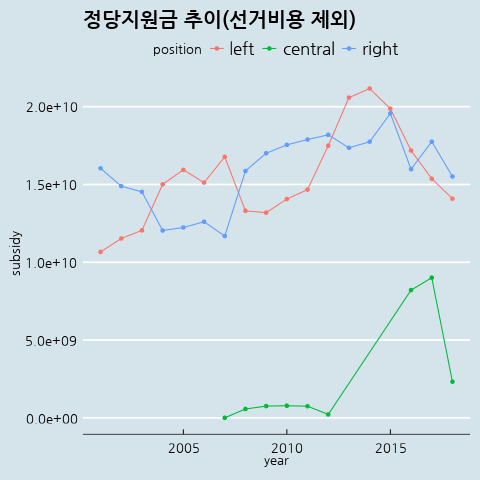

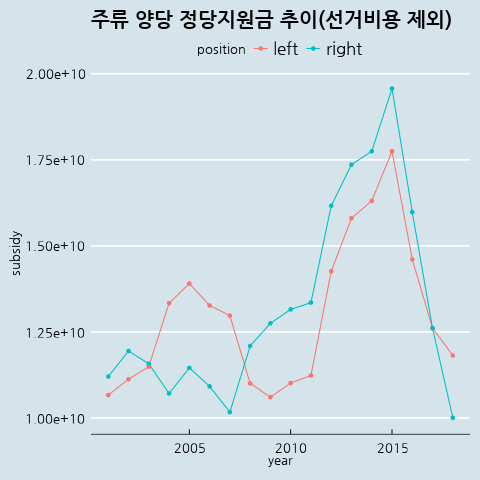

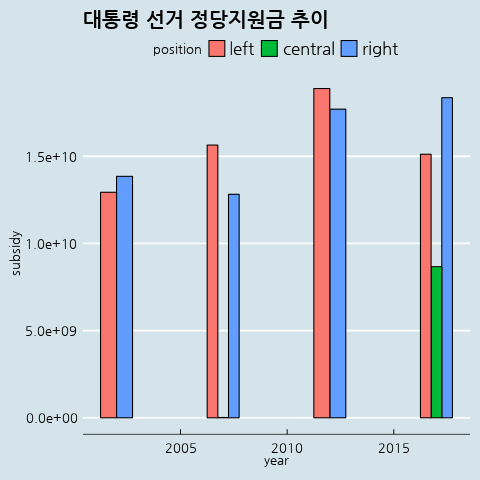

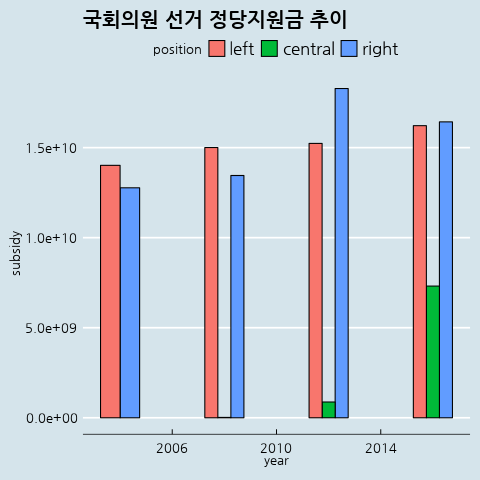

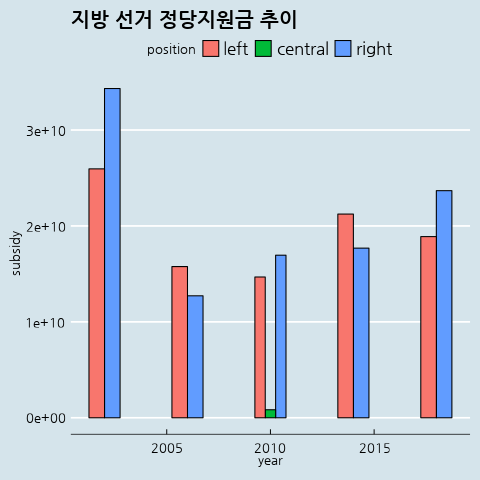

In [169]:
%%R 

my_style <- function(g){
    g + 
    theme_economist() +
    theme(text = element_text(family = "nanumgothic")) -> gg 
    show(gg)
}

showtext_auto()
my_style(g1)  
my_style(g2)    
my_style(g3)
my_style(g4)
my_style(g5)

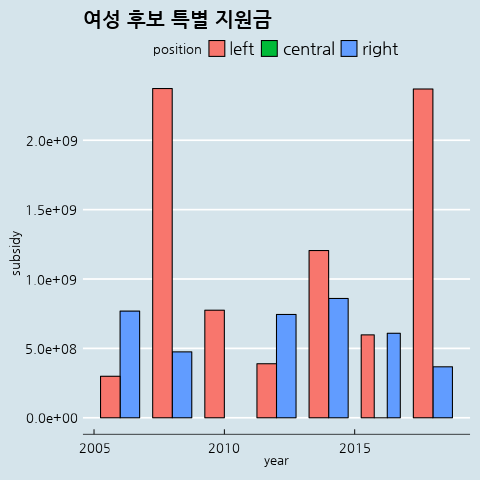

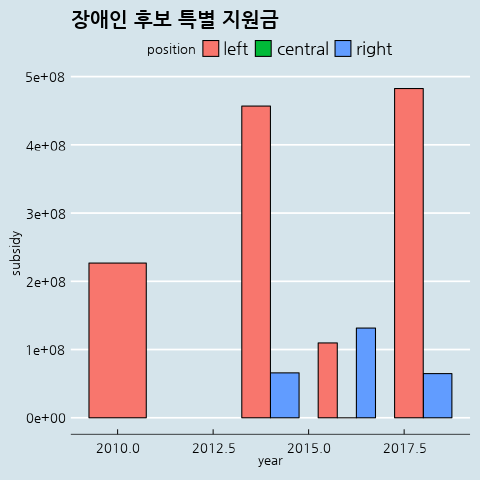

In [173]:
%%R

my_style(g6)
my_style(g7)